In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from code_utils.utils import aplatir,wg_chap_to_dict,get_wg

Visualization of the contribution of each countries in ipcc references

In [2]:
df_ipcc=pd.read_json(module_path+'\\IPCC_bibliography\\AR6\\structured_data\\data_ipcc_visualization.json')

In [3]:
df_ipcc=df_ipcc.drop_duplicates(subset=['doi','chap','wg'])

In [4]:
df_ipcc['wg_chap']=df_ipcc.apply(lambda row: wg_chap_to_dict(row), axis=1)

In [5]:
df_ipcc=df_ipcc.dropna(subset=['doi']).groupby(['doi']).agg({'wg_chap': lambda x: aplatir(list(x)),'countries':lambda x: list(x)[0]}).reset_index()

In [6]:
color_dict = {
'FR': '#BE2125'
}

In [7]:
data_counts = pd.Series(aplatir(list(df_ipcc['countries']))).value_counts().drop('None')

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\haallat\\AppData\\Roaming\\Python\\Python310\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\haallat\\AppData\\Roaming\\Python\\Python310\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C

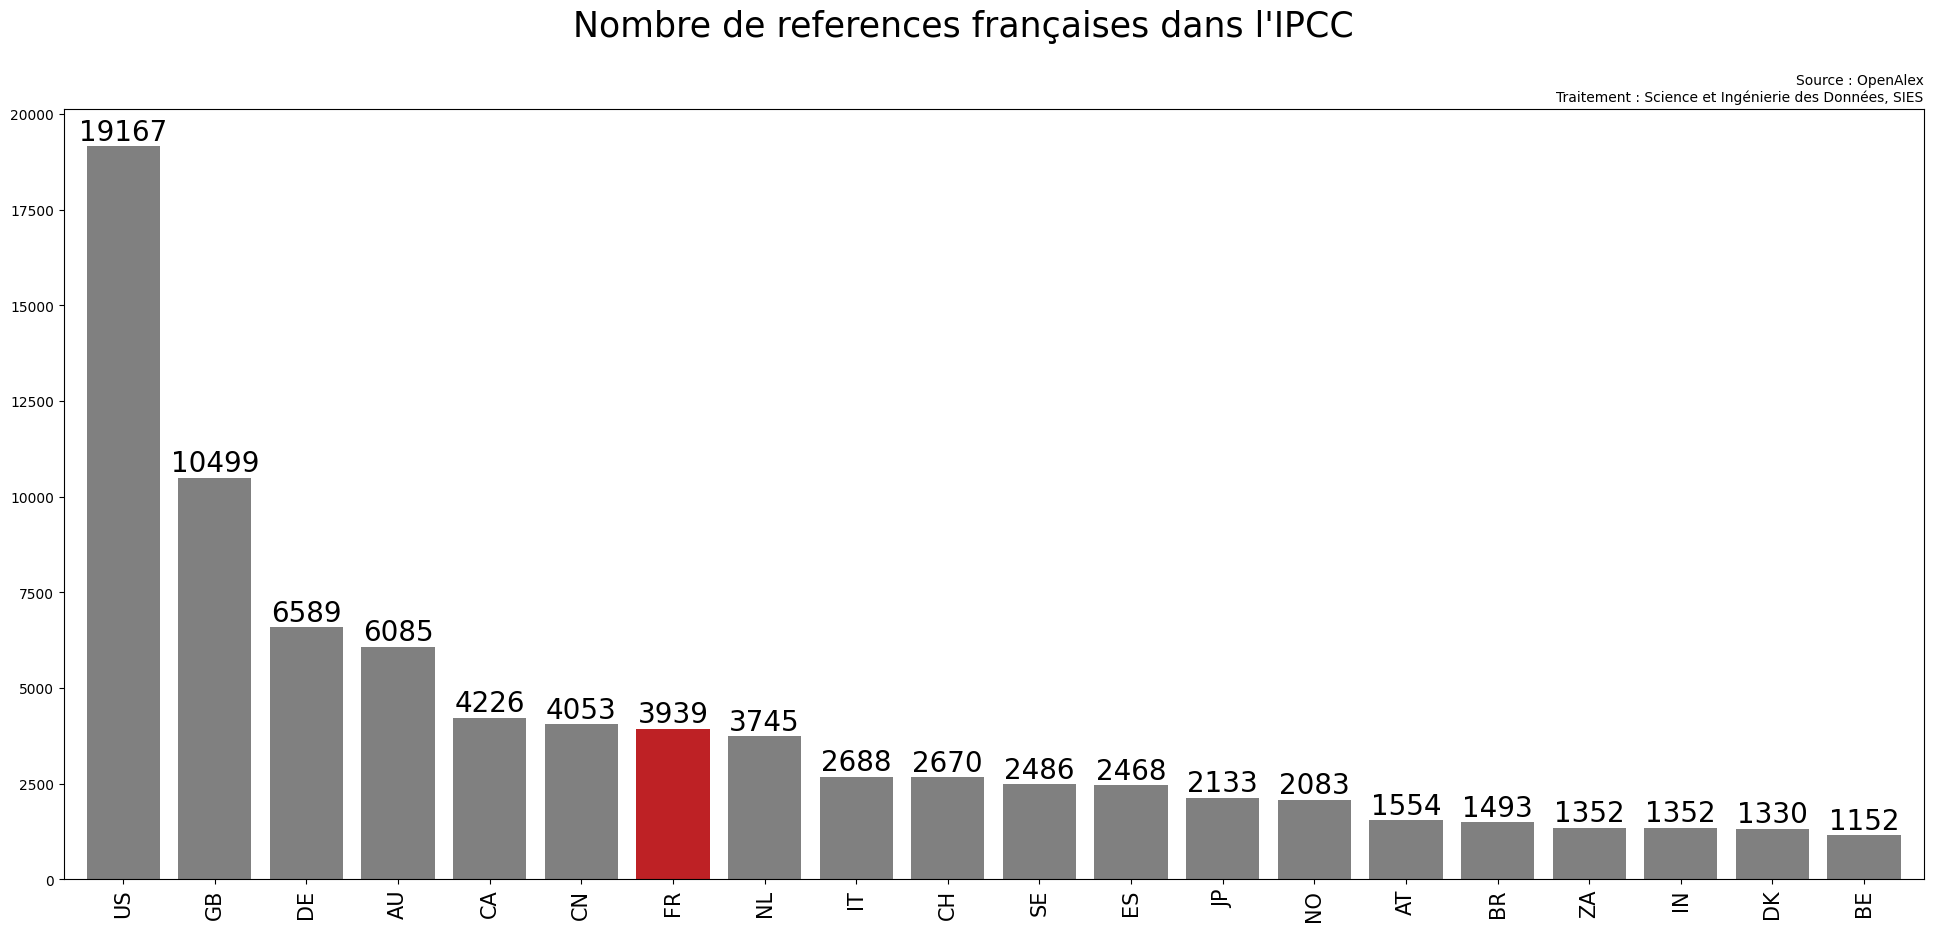

In [8]:
plt.figure(figsize=(24, 10))
ax = data_counts[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in data_counts[:20].index], width=0.8)

for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle(f"Nombre de references françaises dans l'IPCC", size=25)
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_xticklabels(data_counts.index[:20], rotation='vertical', fontsize=15)
plt.show()

C:\Users\haallat\AppData\Local\Temp\ipykernel_12940\2257069433.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=15)
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\haallat\\AppData\\Roaming\\Python\\Python310\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\haallat\\AppData\\Roaming\\Python\\Python310\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
DEBUG:matplotlib.font_manager:findf

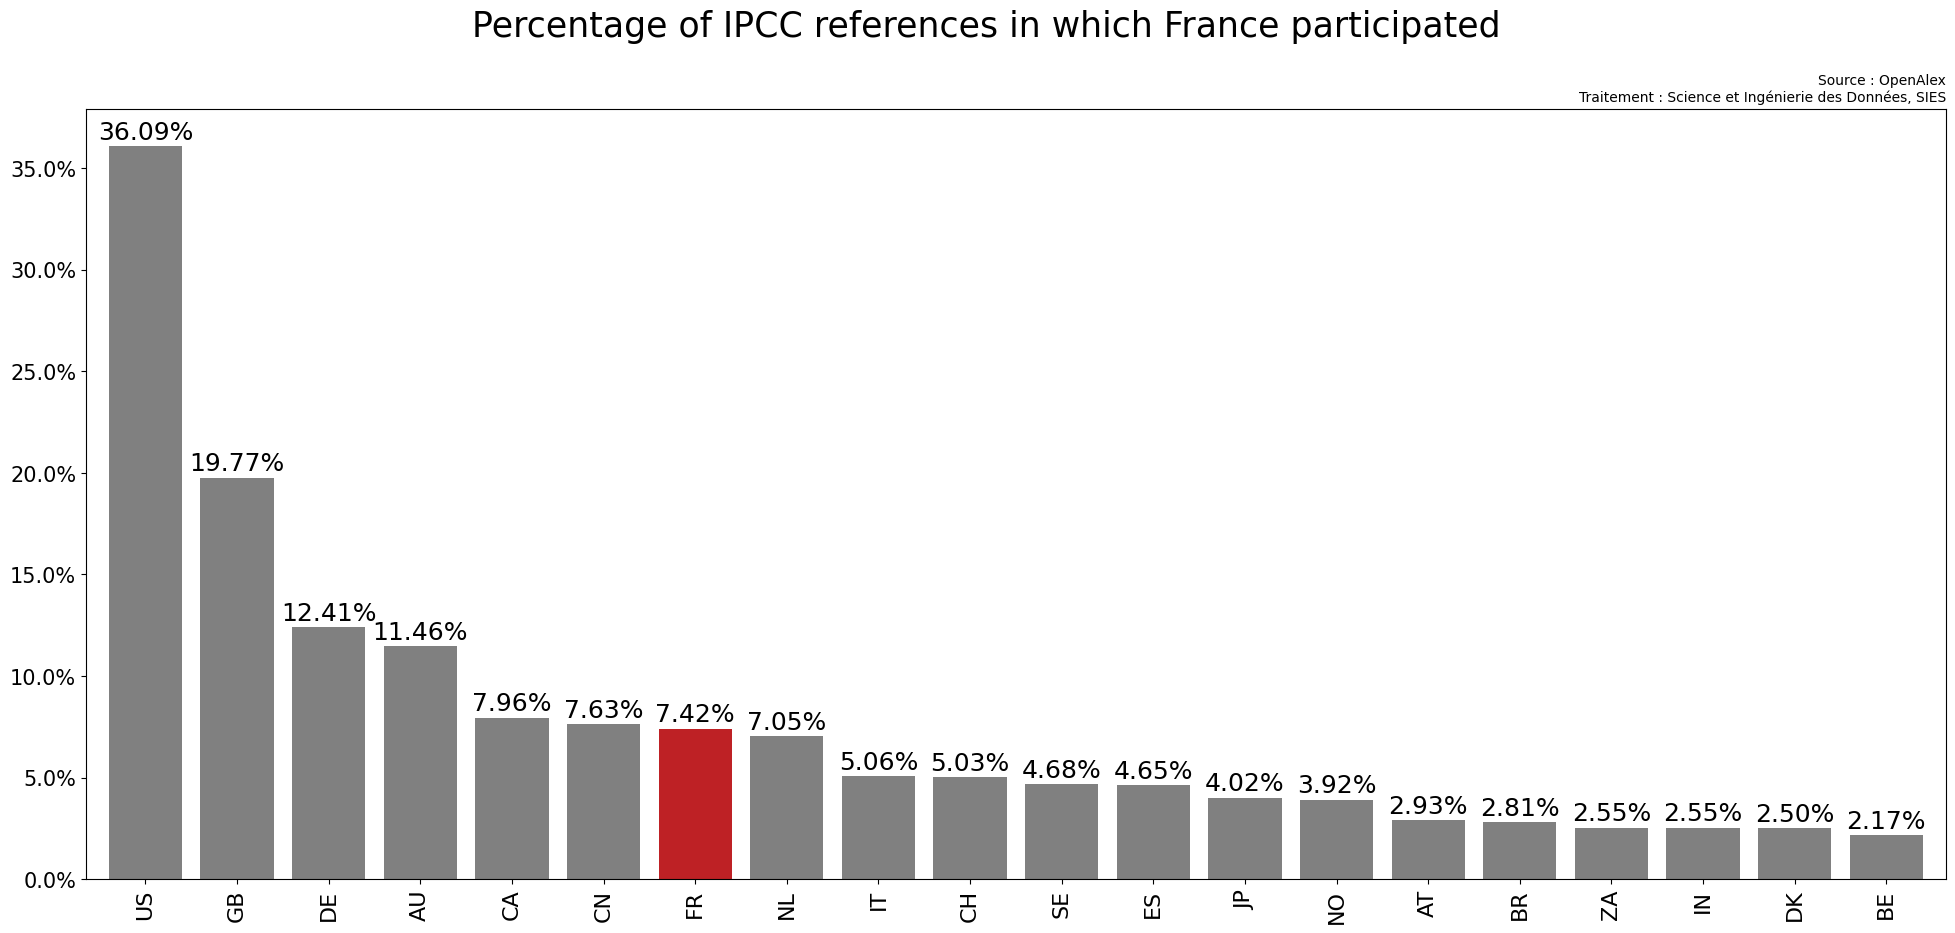

In [9]:
nb_references = len(df_ipcc.doi.dropna().drop_duplicates())
pourcent_data = (data_counts / nb_references) * 100

plt.figure(figsize=(24, 10))
ax = pourcent_data[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in pourcent_data[:20].index], width=0.8)

for i, v in enumerate(pourcent_data[:20]):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom', color='black', fontsize=18)

plt.suptitle(f"Percentage of IPCC references in which France participated", size=25)
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_xticklabels(pourcent_data.index[:20], rotation='vertical', fontsize=16)
ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=15)
plt.show()

Visualization of the contribution of each countries in ipcc references - wg1

In [10]:
df_ipcc_chap=df_ipcc
df_ipcc_chap['wgs_bool']=df_ipcc_chap['wg_chap'].apply(lambda x: get_wg(x,wg1=True,wg2=True,wg2_cross=True,wg3=True))
df_ipcc_chap['wgs_bool'].value_counts()

wgs_bool
False    53088
True        24
Name: count, dtype: int64

In [11]:
dd=df_ipcc.loc[(df_ipcc['wg_chap'].apply(lambda wg_chap: any('1' in x.get('wg', '') for x in wg_chap)))&(df_ipcc['wg_chap'].apply(lambda wg_chap: any('3' in x.get('wg', '') for x in wg_chap)))&(df_ipcc['countries'].apply(lambda countries: not any('FR' in x for x in countries)))&(df_ipcc['wg_chap'].apply(lambda wg_chap: any('2' in x.get('wg', '') for x in wg_chap)))&(df_ipcc['wg_chap'].apply(lambda wg_chap: not any('cross' in x.get('wg', '') for x in wg_chap)))]

In [12]:
dd_fr_wg1=df_ipcc.loc[(df_ipcc['wg_chap'].apply(lambda wg_chap: any('1' in x.get('wg', '') for x in wg_chap)))&(df_ipcc['countries'].apply(lambda countries: not any('FR' in x for x in countries)))]

In [13]:
len(dd)/len(dd_fr_wg1)

0.013896360050206204

In [14]:
df_ipcc.loc[(df_ipcc['wg_chap'].apply(lambda wg_chap: any('1' in x.get('wg', '') for x in wg_chap)))&(df_ipcc['wg_chap'].apply(lambda wg_chap: any('2' in x.get('wg', '') for x in wg_chap)))&(df_ipcc['countries'].apply(lambda countries: any('FR' in x for x in countries)))]

,doi,wg_chap,countries,wgs_bool
96,10.1002/2013jd020941,"[{'name': 'wg1_chap_08', 'wg': '1', 'chap': 8,...","[US, CN, FR]",False
159,10.1002/2014gb005080,"[{'name': 'wg1_chap_08', 'wg': '1', 'chap': 8,...","[GB, BR, FR]",False
399,10.1002/2015gb005140,"[{'name': 'wg1_chap_05', 'wg': '1', 'chap': 5,...","[DE, CH, US, JP, FR, GB]",False
604,10.1002/2015jd024303,"[{'name': 'wg1_chap_11', 'wg': '1', 'chap': 11...","[US, FR]",False
753,10.1002/2016gl068240,"[{'name': 'wg1_chap_08', 'wg': '1', 'chap': 8,...","[DE, CH, US, CA, AU, FR, SE, GB]",False
...,...,...,...,...
52230,10.5194/tc-13-1325-2019,"[{'name': 'wg1_chap_12', 'wg': '1', 'chap': 12...","[ES, AD, FR]",False
52261,10.5194/tc-14-2495-2020,"[{'name': 'wg1_chap_01', 'wg': '1', 'chap': 1,...","[GB, CA, FR]",False
52268,10.5194/tc-14-3155-2020,"[{'name': 'wg1_chap_09', 'wg': '1', 'chap': 9,...","[GB, CA, FR]",False
52284,10.5194/tc-15-1343-2021,"[{'name': 'wg1_chap_09', 'wg': '1', 'chap': 9,...","[DE, SI, IT, CH, AT, FR]",False


C:\Users\haallat\AppData\Local\Temp\ipykernel_12940\237985330.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=15)


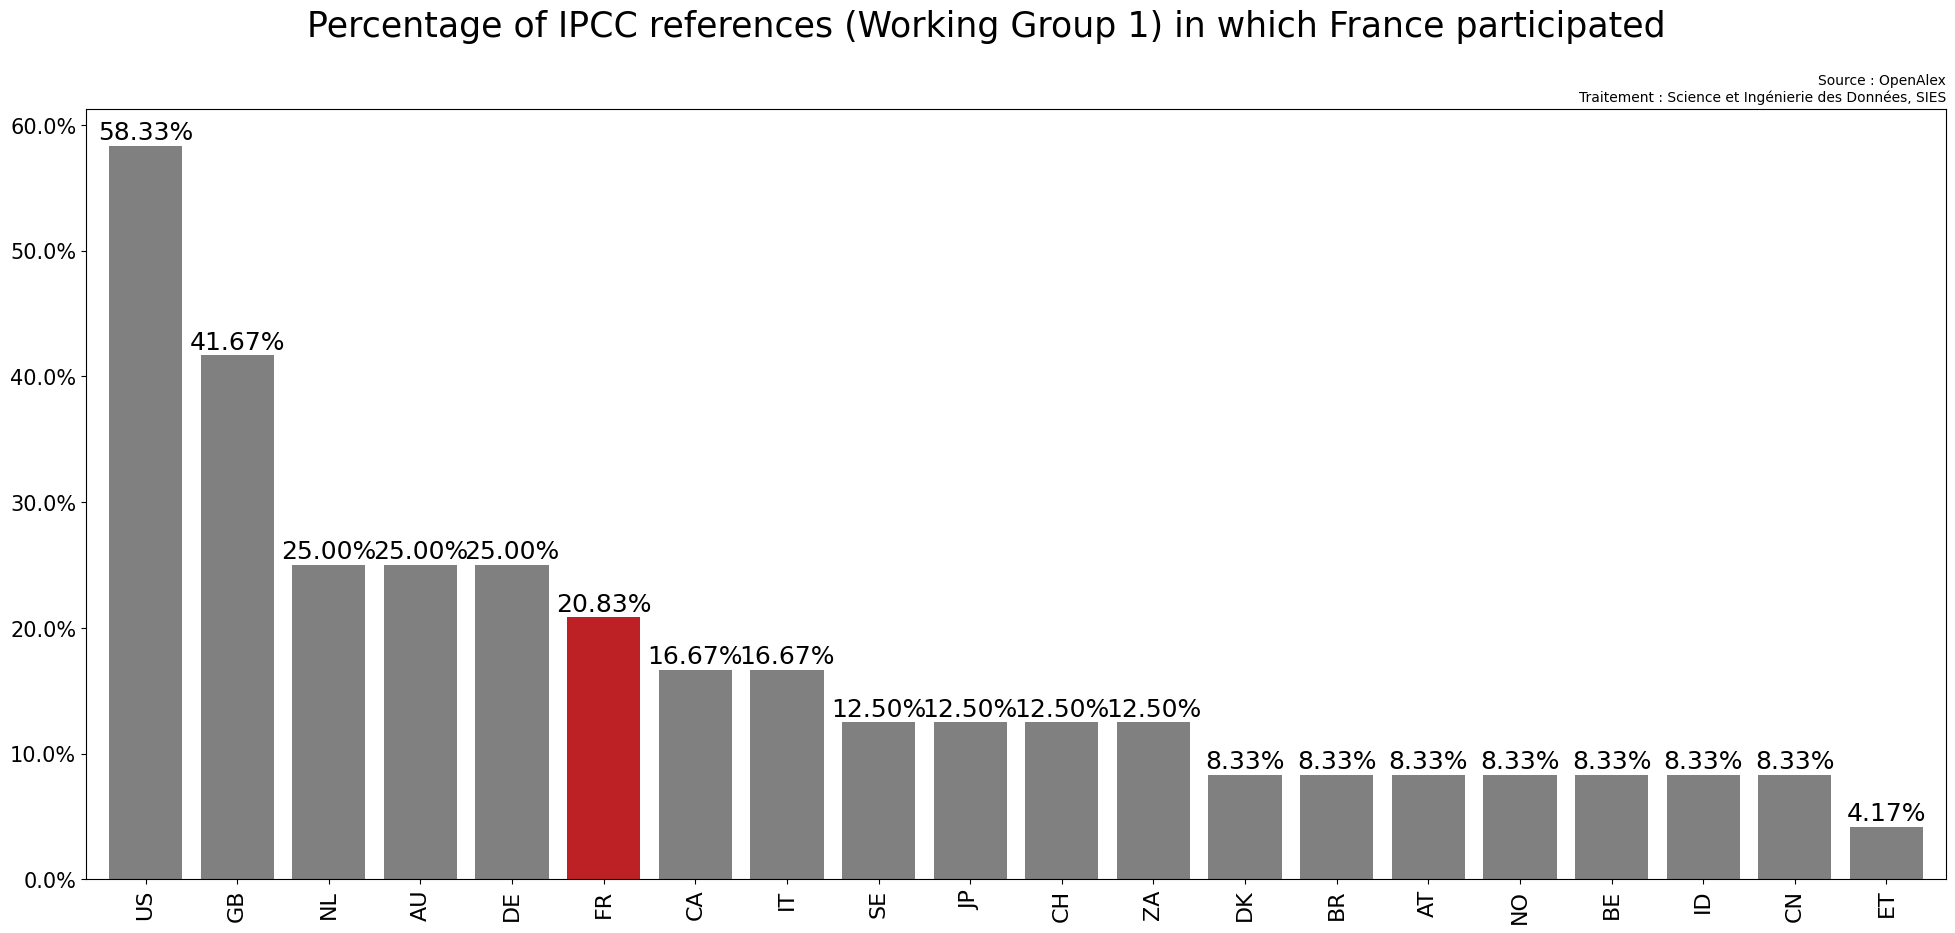

In [15]:
df_ipcc_chap=df_ipcc
df_ipcc_chap
df_ipcc_chap=df_ipcc_chap[df_ipcc_chap.wgs_bool==True]
data_counts = pd.Series(aplatir(list(df_ipcc_chap['countries']))).value_counts().drop('None')

nb_references = len(df_ipcc_chap.doi.dropna().drop_duplicates())
pourcent_data = (data_counts / nb_references) * 100

plt.figure(figsize=(24, 10))
ax = pourcent_data[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in pourcent_data[:20].index], width=0.8)

for i, v in enumerate(pourcent_data[:20]):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom', color='black', fontsize=18)

plt.suptitle(f"Percentage of IPCC references (Working Group 1) in which France participated", size=25)
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_xticklabels(pourcent_data.index[:20], rotation='vertical', fontsize=16)
ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=15)
plt.show()

Visualization of the contribution of each countries in ipcc references - wg2

C:\Users\haallat\AppData\Local\Temp\ipykernel_12940\830921506.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=15)


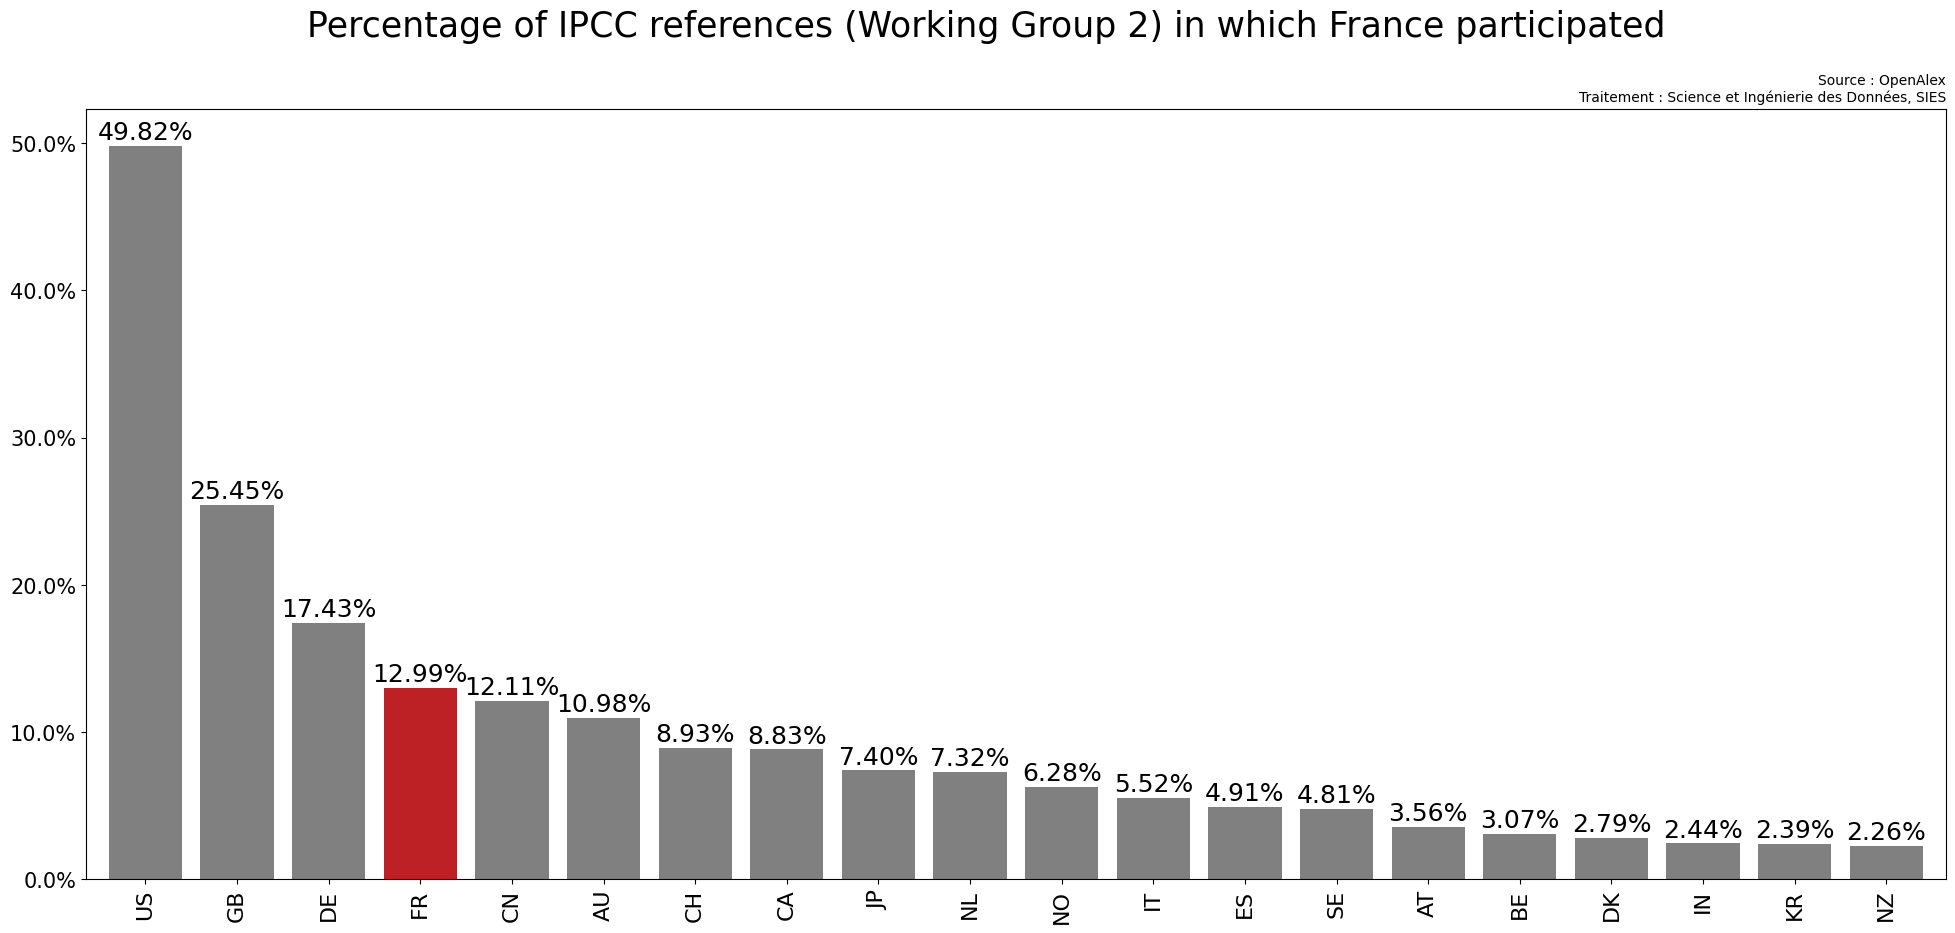

In [16]:
df_ipcc_chap=df_ipcc
df_ipcc_chap['wgs_bool']=df_ipcc_chap['wg_chap'].apply(lambda x: get_wg(x,wg1=True))
df_ipcc_chap=df_ipcc_chap[df_ipcc_chap.wgs_bool==True]
data_counts = pd.Series(aplatir(list(df_ipcc_chap['countries']))).value_counts().drop('None')

nb_references = len(df_ipcc_chap.doi.dropna().drop_duplicates())
pourcent_data = (data_counts / nb_references) * 100

plt.figure(figsize=(24, 10))
ax = pourcent_data[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in pourcent_data[:20].index], width=0.8)

for i, v in enumerate(pourcent_data[:20]):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom', color='black', fontsize=18)

plt.suptitle(f"Percentage of IPCC references (Working Group 2) in which France participated", size=25)
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_xticklabels(pourcent_data.index[:20], rotation='vertical', fontsize=16)
ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=15)
plt.show()

Visualization of the contribution of each countries in ipcc references - wg2 cross chapters

In [ ]:
df_ipcc_chap=df_ipcc

In [ ]:
df_ipcc_chap['wg_chap'].apply(lambda x: get_wg(x,wg2_cross=True))

In [ ]:
df_ipcc_chap=df_ipcc
df_ipcc_chap['wgs_bool']=df_ipcc_chap['wg_chap'].apply(lambda x: get_wg(x,wg2_cross=True))
df_ipcc_chap=df_ipcc_chap[df_ipcc_chap.wgs_bool==True]
data_counts = pd.Series(aplatir(list(df_ipcc_chap['countries']))).value_counts().drop('None')

nb_references = len(df_ipcc_chap.doi.dropna().drop_duplicates())
pourcent_data = (data_counts / nb_references) * 100

plt.figure(figsize=(24, 10))
ax = pourcent_data[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in pourcent_data[:20].index], width=0.8)

for i, v in enumerate(pourcent_data[:20]):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom', color='black', fontsize=18)

plt.suptitle(f"Percentage of IPCC references (Working Group 2 cross chapters) in which France participated", size=25)
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_xticklabels(pourcent_data.index[:20], rotation='vertical', fontsize=16)
ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=15)
plt.show()

Visualization of the contribution of each countries in ipcc references - wg3

In [ ]:
df_ipcc_chap=df_ipcc[df_ipcc.wg=='wg3']
data_counts = pd.Series(aplatir(list(df_ipcc_chap['countries']))).value_counts().drop('None')

nb_references = len(df_ipcc_chap.doi.dropna().drop_duplicates())
pourcent_data = (data_counts / nb_references) * 100

plt.figure(figsize=(24, 10))
ax = pourcent_data[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in pourcent_data[:20].index], width=0.8)

for i, v in enumerate(pourcent_data[:20]):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom', color='black', fontsize=18)

plt.suptitle(f"Percentage of IPCC references (Working Group 3) in which France participated", size=25)
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_xticklabels(pourcent_data.index[:20], rotation='vertical', fontsize=16)
ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=15)
plt.show()